Initial setup and first topic model run

In [59]:
%reload_ext autoreload
%autoreload 2

In [60]:
import wosis
import pandas as pd
import metaknowledge as mk

In [61]:
# Helper functions for plotting
import wosis.analysis.plotting as wos_plot

# Analysis and search functions
from wosis.analysis import (preview_matches, search_records, keyword_matches, 
                            find_pubs_by_authors, preview_matches_by_keyword, get_unique_kw_titles,
                            remove_by_journals, remove_by_title)

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

In [62]:
# Read in data from temporary cache file
query_id = "756d39801152fe5f5f4ad3a3df9b6a30"
RC = mk.RecordCollection("tmp/{}.txt".format(query_id))

expected_num_records = 15754
num_records = len(RC)

assert num_records == expected_num_records, \
    "Mismatch in number of records - expected {}, got {}".format(expected_num_records, num_records)

print("Corpora consists of", num_records, "Publications")

Corpora consists of 15754 Publications


In [63]:
corpora_df = wosis.rc_to_df(RC)

corpora_df, removed_pubs = wosis.constrain.remove_empty_DOIs(corpora_df)
#maybe we don't want to do this for this analysis? older papers less likely to have dois?

Removing 1799 records with no DOIs


In [64]:
# removed_pubs

In [65]:
# Hiding keywords and abstract for tutorial (WoS-owned IP)
hide_columns = ['DE', 'abstract', 'keywords', 'DOI', 'id', 'kws']
corpora_df.loc[:, ~corpora_df.columns.isin(hide_columns)].head()  # display first 5

,year,title,copyright,AU,SO
0,2015,Modelling biological oxygen demand in wastewat...,,"Sakizadeh, Mohamad|Shayegan, Eshagh|Lar, Mojta...",JOURNAL OF WATER SANITATION AND HYGIENE FOR DE...
1,2015,A coupled ensemble filtering and probabilistic...,(C) 2015 Elsevier B.V. All rights reserved.,"Fan, Y. R.|Huang, W. W.|Li, Y. P.|Huang, G. H....",JOURNAL OF HYDROLOGY
2,2007,lambda-OAT: lambda-geometry obstacle-avoiding ...,,"Jing, Tom Tong|Feng, Zhe|Hu, Yu|Hong, Xianlong...",IEEE TRANSACTIONS ON COMPUTER-AIDED DESIGN OF ...
3,2016,Enhanced ant colony optimization for multiscal...,,"Hu, Nan|Fish, Jacob",COMPUTATIONAL MECHANICS
4,2001,Modeling soluble phosphorus desorption kinetic...,,"Scott, CA|Weiler, KW",JOURNAL OF IRRIGATION AND DRAINAGE ENGINEERING


In [66]:
# Create a new metaknowledge collection
filtered_corpora = wosis.extract_recs(corpora_df.loc[:, 'id'], RC, name='Filtered Corpora')

In [67]:
from wosis.analysis import find_topics

filtered_corpora_df = wosis.rec_to_df(filtered_corpora)
topic_results = find_topics(filtered_corpora_df, num_topics=5)

Topic 1: water model soil flow river parameters sensitivity groundwater runoff data
Topic 2: optimization design method shape topology sensitivity problem element finite structural
Topic 3: energy life cycle environmental emissions production waste assessment lca impact
Topic 4: uncertainty model models stochastic data analysis parameter parameters method bayesian
Topic 5: risk exposure assessment health cancer risks human flood probabilistic dose


In [68]:
topic_4_set = topic_results.get_topic_by_id(4)

In [69]:
topic_4_recs = wosis.extract_recs(topic_4_set.loc[:, 'id'], RC, 'Topic of Interest')

In [70]:
#run topic model on topic 4
topic_4_subtopics = find_topics(topic_4_set, num_topics=5)

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Topic 1: uncertainty model uncertainties analysis water models quality assessment results modeling
Topic 2: stochastic random polynomial chaos method quantification equations expansion collocation solution
Topic 3: sensitivity analysis model parameters global models based input parameter output
Topic 4: bayesian data model posterior parameter prior markov inference models estimation
Topic 5: fuzzy network decision neural ann criteria networks data artificial making


In [71]:
# Need config file
wos_config = wosis.load_config('config.yml')

In [72]:
subtopic1 = topic_4_subtopics.get_topic_by_id(1)
subtopic3 = topic_4_subtopics.get_topic_by_id(3)

In [73]:
uncertainty_model_rc = wosis.extract_recs(subtopic1['id'], RC, name='uncertainty_model')

In [74]:
sensitivity_analysis_rc = wosis.extract_recs(subtopic3['id'], RC, name='sensitivity_analysis')

<hr>
Running topic model on subtopics1,3

In [75]:
subtopic1_topics = find_topics(subtopic1, num_topics=5)

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Topic 1: model analysis uncertainties models data parameters carlo method monte using
Topic 2: model parameter calibration glue hydrological swat rainfall likelihood watershed runoff
Topic 3: flood inundation damage rainfall forecasting mapping river frequency maps extreme
Topic 4: urban modelling quality drainage stormwater water glue integrated sewer likelihood
Topic 5: air emission quality emissions pollution pollutant dispersion pm concentrations source


In [76]:
subtopic3_topics = find_topics(subtopic3, num_topics=5)

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Topic 1: model sensitivity parameters models parameter uncertainty based data simulation method
Topic 2: indices variance sobol sensitivity inputs global input output based measures
Topic 3: failure reliability probability kriging carlo monte method proposed probabilistic mcs
Topic 4: semantic lsa latent knowledge similarity vector space representation learning user
Topic 5: sampling latin hypercube monte carlo sample random samples number methods


In [77]:
sub1subtopic1 = subtopic1_topics.get_topic_by_id(1)
sub1subtopic2 = subtopic1_topics.get_topic_by_id(2)
sub3subtopic1 = subtopic3_topics.get_topic_by_id(1)

<hr>
Running key-phrase extraction on the whole subtopics and merging the three into two collections.

In [78]:
model_analysis_rc = wosis.extract_recs(sub1subtopic1['id'], RC, name='model_analysis')
model_param_rc = wosis.extract_recs(sub1subtopic2['id'], RC, name='model_param')
model_sens_rc = wosis.extract_recs(sub3subtopic1['id'], RC, name='model_sens')

In [79]:
model_analysis_cites = wosis.get_num_citations(model_analysis_rc, wos_config, cache_dir='tmp')
model_param_cites = wosis.get_num_citations(model_param_rc, wos_config, cache_dir='tmp')
model_sens_cites = wosis.get_num_citations(model_sens_rc, wos_config, cache_dir='tmp')

In [80]:
#would like to know how to run the model on the whole topic.  This is the makeshift method.
res_model_analysis = wosis.analysis.constrain.find_phrases(model_analysis_cites[0:100])

In [81]:
res_model_analysis.display_phrases()

Uncertainty in simulating wheat yields under climate change (2013) 
https://dx.doi.org/10.1038/NCLIMATE1916 

     Projections of climate change impacts on crop yields are inherently uncertain(). 

     Here we present the largest standardized model intercomparison for climate change impacts so far. 

     These impact uncertainties can be reduced by improving temperature and CO relationships in models and better quantified through use of multi-model ensembles. 

     We found that individual crop models are able to simulate measured wheat grain yields accurately under a range of environments, particularly if the input information is sufficient. 


Reconciling theory with observations: elements of a diagnostic approach to model evaluation (2008) 
https://dx.doi.org/10.1002/hyp.6989 

     and can be readily applied to the problem of process evaluation leading to improved predictions in ungaged basins. 

     and steps are proposed towards the development of a robust and powerful 'Theor

     The different steps in the predictive uncertainty framework are illustrated using a simple example in computational fluid dynamics applied to a hypersonic wind tunnel. 

     The framework is comprehensive in the sense that it treats both types of uncertainty (aleatory and epistemic), incorporates uncertainty due to the mathematical form of the model, and it provides a procedure for including estimates of numerical error in the predictive uncertainty. 

     An overview of a comprehensive framework is given for estimating the predictive uncertainty of scientific computing applications. 

     Finally, methods for conveying the total predictive uncertainty to decision makers are presented. 

     Approaches for propagating both types of uncertainties through the model to the system response quantities of interest are briefly discussed. 


Uncertainty analysis of statistical downscaling methods (2006) 
https://dx.doi.org/10.1016/j.jhydrol.2005.06.035 

     In case of daily maximum 

An overview of methods to evaluate uncertainty of deterministic models in decision support (2015) 
https://dx.doi.org/10.1016/j.envsoft.2014.09.017 

     (C)  The Authors. 

     The best way to evaluate the uncertainty depends on the definitions of the source models and the amount and quality of information available to the modeller. 

     We review various methods that have been or could be applied to evaluate the uncertainty related to deterministic models' outputs. 

     To achieve this, efficient decision support integrates the results of pre-existing models. 

     There is an increasing need for environmental management advice that is wide-scoped, covering various interlinked policies, and realistic about the uncertainties related to the possible management actions. 


Evaluating uncertainty in integrated environmental models: A review of concepts and tools (2009) 
https://dx.doi.org/10.1029/2008WR007301 

     These constructs provide a reference point for cataloging  differ

Uncertainty of predictions of embankment dam breach parameters (2004) 
https://dx.doi.org/10.1061/(ASCE)0733-9429(2004)130:5(389) 

     or the estimation of peak breach outflows. 

     The prediction uncertainties of these methods are widely recognized to be very large, but have never been specifically quantified. 


Parameter uncertainty and the significance of simulated land use change effects (2003) 
https://dx.doi.org/10.1016/S0022-1694(02)00395-5 

     Uncertainty in parameters characterising different land covers leads to uncertainty in model predictions of land use change effects. 

     It consists of the following steps: (a) The uncertainty in land cover-dependent parameters is quantified. 

     In this study, a new approach is presented which allows a model to be assessed to see whether it is suitable for investigating land use change scenarios in the sense that different land covers can be significantly distinguished in their effects on model output. 


Uncertainty analy

     In order to cope with uncertainties and make them more transparent for landscape managers, we demonstrate them by reviewing literature, describing an example and proposing approaches for uncertainty analysis. 

     As for landscape analysis, the fundamental uncertainty origins are landscape complexity and methodological uncertainties. 


A combined Monte Carlo and possibilistic approach to uncertainty propagation in event tree analysis (2008) 
https://dx.doi.org/10.1111/j.1539-6924.2008.01085.x 

     In this article, a hybrid method that jointly propagates probabilistic and possibilistic uncertainties is considered and compared with pure probabilistic and pure fuzzy methods for uncertainty propagation. 

     Traditionally, probabilistic distributions have been used to characterize the epistemic uncertainty due to imprecise knowledge of the parameters in risk models. 

     In practice, it is to be expected that a risk model contains some parameters affected by uncertainties tha

     We conclude on the use of high resolution imaging spectrometers and suggest further development of imaging spectrometers supporting science grade spectroscopy measurements. 

     (C)  The Authors. 

     Radiance based vicarious calibration is traceable to a secondary standard with <= % uncertainty. 

     We establish traceability of APEX radiances to a primary calibration standard, including uncertainty analysis. 

     APEX is calibrated using a combination of laboratory, in-flight and vicarious calibration approaches. 


Galaxy Formation: a Bayesian Uncertainty Analysis (2010) 
https://dx.doi.org/10.1214/10-BA524 

     Galform models the creation an devolution of approximately one million galaxies from the beginning of the Universe until the current day, an disregarded as a state-of-the-art model within the cosmology community. 

     The analysis was successful inproducing a large collection of model evaluations that exhibit good fits to the observed data. 

     A Bayes Li

     Conclusions The probability distributions obtained with the Taylor series expansion are virtually equivalent to those from a classical Monte Carlo simulation, while being significantly easier to obtain. 

     We then extend this approach to the comparison of two or more LCA scenarios. 

     For the steel front end panel, the factor contributing most to the climate change score uncertainty is the gasoline consumption (>%). 


A sampling-based computational strategy for the representation of epistemic uncertainty in model predictions with evidence theory (2007) 
https://dx.doi.org/10.1016/j.cma.2006.10.049 

     This presentation describes and illustrates a sampling-based computational strategy for the representation of epistemic uncertainty in model predictions with evidence theory. 

     Preliminary trials indicate that the presented strategy can be used to propagate uncertainty representations based on evidence theory in analysis situations where naive sampling-based (i.e., u

A novel framework for discharge uncertainty quantification applied to 500 UK gauging stations (2015) 
https://dx.doi.org/10.1002/2014WR016532 

     This study presents a generalized framework for estimating discharge uncertainty at many gauging stations with different errors in the stage-discharge relationship. 

     The framework was applied to  gauging stations in England and Wales and we evaluated the magnitude of discharge uncertainty at low, mean and high flow points on the rating curve. 

     There is a wide variety of techniques to assess discharge uncertainty. 

     The methodology utilizes a nonparametric LOWESS regression within a novel framework that accounts for uncertainty in the stage-discharge measurements, scatter in the stage-discharge data and multisection rating curves. 

     However, few studies have developed generalized approaches to quantify discharge uncertainty. 


Use of paired simple and complex models to reduce predictive bias and quantify uncertainty (

     Field measurements of mercury dry deposition, better quantification of mercury air-surface exchange and further investigation of mercury redox chemistry are needed for reducing model uncertainties and for improving the performance of atmospheric mercury models. 

     Removing GEM-OH reaction is not sufficient to balance the excessive mercury removal caused by eliminating the HO mechanism. 

     Change in model mercury chemistry has a greater impact on simulated wet deposition than on dry deposition. 

     The simulated wet deposition is sensitive to the aqueous Hg(II) sorption scheme, and to the GEM oxidation product assignment. 

     Using the upper-limit kinetics of GEM-O- reaction or eliminating aqueous Hg(II)-HO reaction results in unreasonably high deposition and depletion of gaseous mercury in the domain. 


Quantifying uncertainty from large-scale model predictions of forest carbon dynamics (2006) 
https://dx.doi.org/10.1111/j.1365-2486.2006.01176.x 

     Linking envir

     This indicates that the NREL model has severe parameter uncertainty, likely to be the case for other hydrolysis models as well since similar kinetic expressions are used. 

     This allows judging the fitness of the model to the purpose under uncertainty. 

     An identifiability analysis revealed that only  out of  parameters are identifiable from the available data (typical hydrolysis experiments). 

     Attempting to identify a higher number of parameters (as done in the original NREL model publication) results in significant errors on the parameter estimates. 

     The reasons for this poor identifiability are related to (i) model structure complexity, inherently containing correlated parameters due to Michaelis-Menten type kinetics, and (ii) the available data, which are not informative enough (sensitivities of  parameters were insignificant). 


Uncertainty Analysis of the Nonideal Competitive Adsorption-Donnan Model: Effects of Dissolved Organic Matter Variability on Pr

     The main objective of this study was to explore an innovative framework in which a systematic UA can be effectively and efficiently performed for integrated SW-GW models of large river basins and to illuminate how process understanding, model calibration, data collection, and management can benefit from such a systematic UA. 

     The applicability and advantages of the framework were evaluated and validated through an integrated SW-GW model for the Zhangye Basin in the middle Heihe River Basin, northwest China. 

     Overall, this study confirms that a systematic UA should play a critical role in integrated SW-GW modeling of large river basins, and the PCM-based approach is a promising option to fulfill this role. 

     The study shows that, under the complex SW-GW interactions, the modeling uncertainty has great spatial and temporal variabilities and is highly output-dependent. 


A probabilistic construction of model validation (2008) 
https://dx.doi.org/10.1016/j.cma.2007.0

     For an appropriate use in risk management, the uncertainties associated with Such Studies should be investigated. 

     Cap rock failure assessment. 




In [82]:
model_analysis = wosis.rc_to_df(model_analysis_rc)
model_analysis.to_csv('model_analysis.csv', index = False)

In [83]:
#would like to know how to run the model on the whole topic.  This is the makeshift method.
res_model_param = wosis.analysis.constrain.find_phrases(model_param_cites[0:100])

In [84]:
res_model_param.display_phrases()

Sensitivity and uncertainty analysis coupled with automatic calibration for a distributed watershed model (2005) 
https://dx.doi.org/10.1016/j.jhydrol.2004.09.005 

     To demonstrate their effectiveness, the parameter identification, parameter estimation, model verification, and uncertainty analysis techniques are applied to a watershed located in southern Illinois. 

     The global parameter sensitivity analysis is conducted using a stepwise regression analysis on rank-transformed input-output data pairs. 

     The Generalized Likelihood Uncertainty Estimation methodology is subsequently implemented to investigate uncertainty of model estimates, accounting for errors due to model structure, input data and model parameters. 


Appraisal of the generalized likelihood uncertainty estimation (GLUE) method (2008) 
https://dx.doi.org/10.1029/2008WR006822 

     Beven and others have suggested that the choice of the likelihood measure used in a GLUE computation is subjective and may be s

     FOEA results showed that only a few parameters had significantly affected the uncertainty of the final simulation results, and many parameters had little or no effect. 

     The uncertainty of runoff was smaller compared to that of sediment, organic N, nitrate, and TP, and the source of uncertainty was mainly affected by parameters associated with runoff. 

     In this study, three methods were adopted to do the parameter uncertainty analysis with the Soil and Water Assessment Tool (SWAT). 

     Based on the results of parameter sensitivity analysis by the Morris screening method, the ten parameters that most affect runoff, sediment, organic N, nitrate, and total phosphorous (TP) were chosen for further uncertainty analysis. 

     MC results indicated that neglecting the parameter uncertainty of the model would underestimate the non-point source pollution load, and that the relationship between model input and output was non-linear. 


A framework for propagation of uncertaint

     The coefficients used for the quantification are estimated simultaneously with the model parameters. 


On the assessment of the impact of reducing parameters and identification of parameter uncertainties for a hydrologic model with applications to ungauged basins (2006) 
https://dx.doi.org/10.1016/j.jhydrol.2005.07.010 

     We introduce an alternative subsurface flow parameterization into VIC-L to reduce the impacts of model parameter uncertainties on model simulations by reducing the number of model parameters that need to be estimated through a calibration process. 

     Studies based on the  MOPEX watersheds show that compared to the parameter associated with the new subsurface flow parameterization, the VIC shape parameter (i.e. 

     the b parameter that represents the shape of the heterogeneity distribution of effective soil moisture capacity over a study area) has a larger impact on model simulations and could introduce more uncertainty if not estimated appropriately. 

     Results indicate that: () The three modified hydrological models can reproduce daily streamflow series with acceptable accuracy. 

     High P-CIs of GLUE estimate for high-flows (Q and Q) indicate that TOPMODEL generally performs best under different threshold values, while XAJ model produces the smallest ARIL under different threshold values. 


An application of the GLUE methodology for estimating the parameters of the INCA-N model (2006) 
https://dx.doi.org/10.1016/j.scitotenv.2006.02.034 

     The conceptual and parameter uncertainty of the semi-distributed INCA-N (Integrated Nutrients in Catchments-Nitrogen) model was studied using the GLUE (Generalized Likelihood Uncertainty Estimation) methodology combined with quantitative experimental knowledge, the concept known as 'soft data'. 

     The INCA-N model was able to simulate the seasonal and inter-annual variations in the stream-water nitrate concentrations, although the lowest concentrations during the growing season wer

https://dx.doi.org/10.1016/j.jhydrol.2009.10.025 

     and . 

     Overall the methodology allowed to efficiently discriminate between parameter and total predictive uncertainty and to highlight scope for model improvement. 

     This study reports on the use the recently developed Differential Evolution Adaptative Metropolis algorithm (DREAM) to calibrate in a Bayesian framework the continuous, spatially distributed, process-based and plot-scale runoff model described by Laloy and Bielders (). 

     for, respectively, the Upper and lower bounds of the % uncertainty interval associated with parameter uncertainty. 

     The calibration procedure, relying on  years of daily runoff measurements, accounted for heteroscedasticity and autocorrelation. 


Characterizing parameter sensitivity and uncertainty for a snow model across hydroclimatic regimes (2011) 
https://dx.doi.org/10.1016/j.advwatres.2010.10.002 

     Of the six hydroclimatic characteristics studied, only air temperature 

     Results from this study indicate that a LHS constrained sampling scheme has the potential to achieve computational efficiency for hydrologic assessment of satellite rainfall retrievals involving: () slow running models (such as distributed hydrologic models and land surface models); () large study regions; and () long study periods; provided the assessment is confined to analysis of the large error bounds of the runoff distribution. 

     In this study, Latin Hypercube Sampling (LHS) was implemented in a satellite rainfall error model to explore the degree of computational efficiency that could be achieved with a complex hydrologic model. 

     A full-scale assessment would require a large number of Monte Carlo (MC) runs of the satellite error model realizations, each passed through a hydrologic model, in order to derive the probability distribution in runoff. 

     It was found that the LHS method is particularly suited for storms with moderate rainfall. 

     However, for sl

Quantifying the uncertainty of nonpoint source attribution in distributed water quality models: A Bayesian assessment of SWAT's sediment export predictions (2014) 
https://dx.doi.org/10.1016/j.jhydrol.2014.10.007 

     We answer four interrelated questions: can SWAT determine suspended sediment sources with confidence when end of basin data is used for calibration? 

     We conclude with recommendations for future research to reduce the uncertainty encountered when using distributed nonpoint source models for source apportionment. 

     However, little work has been undertaken to understand the sources and ramifications of the uncertainty involved in their use. 

     We show that: (i) despite reasonable fit at the basin outlet, the simulated sediment sources are subject to uncertainty sufficient to undermine the typical approach of reliance on a single, best fit simulation; (ii) more than a third of the uncertainty of sediment load predictions may stem from the discharge submodel; 

     The combined total flow and peak flow data were an efficient alternative to the intensive -min flow data for reducing SWMM parameter and output uncertainties. 

     Several runoff control parameters were found to have a great effect on peak flows, including the newly introduced parameters for trees. 

     In addition, for a better understanding of the hydrological responses of different pervious land covers in urban areas, we developed new parameter sets in SWMM representing the hydrological properties of trees and lawns, which were estimated through the GLUE procedure. 


Flood and drought hydrologic monitoring: the role of model parameter uncertainty (2015) 
https://dx.doi.org/10.5194/hess-19-3239-2015 

     Global and climate type results indicate that parameter uncertainty remains an important concern for predicting extreme events even after applying monthly and annual constraints to the ensemble, suggesting a need for improved prior distributions of the model parameters as


Parameter and rating curve uncertainty propagation analysis of the SWAT model for two small Mediterranean catchments (2013) 
https://dx.doi.org/10.1080/02626667.2013.837222 

     To efficiently compare the different uncertainty methods and the effect of the uncertainty of the rating curve on model prediction uncertainty, common criteria were set for the likelihood function, the threshold value and the number of simulations. 

     Subsequent sensitive parameter calibration and SWAT prediction uncertainty were analysed by considering, firstly, deterministic discharge data (assuming no uncertainty in discharge data) and secondly, uncertainty in discharge data through the development of a methodology that accounts explicitly for error in the rating curve (the stage-discharge relationship). 

     Initially, a sensitivity analysis was conducted using the LH-OAT method. 

     Model calibration and prediction uncertainty were assessed simultaneously by using three different techniques (SU

     Growing concerns have been given to parameter uncertainty in hydrological modeling because of the associated effects on water resource management. 


Uncertainty analysis for extreme flood events in a semi-arid region (2015) 
https://dx.doi.org/10.1007/s11069-015-1812-9 

     Natural uncertainty is incorporated in the distribution function of the series of annual maximum daily rainfall, and model uncertainty is an epistemic uncertainty source. 

     This paper investigates two types of natural and model uncertainties in extreme rainfall-runoff events in a semi-arid region. 

     The kinematic runoff and erosion model was used for rainfall-runoff simulation. 

     These uncertainties are presented in the rainfall-runoff modeling for investigation of uncertainty effects on extreme hydrological events discharge and can be embedded into guidelines for risk-based design and management of urban water infrastructure. 


Effect of Rainfall Measurement Errors on Nonpoint-Source Polluti

     With respect to the parameter uncertainty and model structural uncertainty, it is anticipated that the complex, nonlinear structure, and numerous parameters included in the SWAT model may lead to a failure to identify parameters, as well as equifinality phenomenon. 


Multi-site evaluation to reduce parameter uncertainty in a conceptual hydrological modeling within the GLUE framework (2014) 
https://dx.doi.org/10.2166/hydro.2013.204 

     The results showed that the number and standard deviation of behavioral parameter sets decreased, and the simulated runoff series by the Xinanjiang model with the behavioral parameter sets can fit better with the observed runoff series when setting the threshold value at the interior sites. 

     This study focuses on reducing parameter uncertainty by multi-sites validating for the conceptual Xinanjiang model. 


Application of a Sampling Based on the Combined Objectives of Parameter Identification and Uncertainty Analysis of an Urban Rainfall-

     This study is designed to consider the uncertainty in the kinematic runoff and erosion model named KINEROS. 

     The Generalized Likelihood Uncertainty Estimation (GLUE) method was used for assessing the uncertainty associated with model predictions, which assumes that due to the limitations in model structure, data and calibration scheme, many different parameter sets can make acceptable simulations. 


A method to reduce the computational requirement while assessing uncertainty of complex hydrological models (2015) 
https://dx.doi.org/10.1007/s00477-014-0958-4 

     The proposed method also resulted in an uncertainty reduction in terms of reduced average band width and high containing ratio. 

     The generalized likelihood uncertainty estimation method (GLUE) is one of the most commonly used methods in the field of hydrology. 

     It is envisaged that conditional sampling, while generating ensembles for the GLUE, can help reduce the number of model simulations. 

     The

In [85]:
model_param = wosis.rc_to_df(model_param_rc)
model_param.to_csv('model_param.csv', index = False)

In [86]:
#would like to know how to run the model on the whole topic.  This is the makeshift method.
res_model_sens = wosis.analysis.constrain.find_phrases(model_sens_cites[0:100])

In [87]:
res_model_sens.display_phrases()

How to avoid a perfunctory sensitivity analysis (2010) 
https://dx.doi.org/10.1016/j.envsoft.2010.04.012 

     Mathematical modelers from different disciplines and regulatory agencies worldwide agree on the importance of a careful sensitivity analysis (SA) of model-based inference. 

     The most popular SA practice seen in the literature is that of 'one-factor-at-a-time' (OAT). 

     The present paper introduces a novel geometric proof of the inefficiency of OAT, with the purpose of providing the modeling community with a convincing and possibly definitive argument against OAT. 

     This consists of analyzing the effect of varying one model input factor at a time while keeping all other fixed. 


Practical identifiability analysis of large environmental simulation models (2001) 
https://dx.doi.org/10.1029/2000WR900350 

     It is shown how these measures provide identifiability diagnosis for parameter subsets, how they are able to guide the selection of identifiable parameter su

Experimental design in systems biology, based on parameter sensitivity analysis using a Monte Carlo method: A case study for the TNF alpha-mediated NF-kappa B signal transduction pathway (2003) 
https://dx.doi.org/10.1177/0037549703040943 


Inter-comparison of receptor models for PM source apportionment: Case study in an industrial area (2008) 
https://dx.doi.org/10.1016/j.atmosenv.2007.12.056 

     The combined application of different types of receptor models would solve the limitations of each of the models, by constructing a more robust solution based on their strengths. 

     and alpha>. 

     Three of the most widespread receptor models (principal component analysis, PCA; positive matrix factorization, PMF; chemical mass balance, CMB) were applied to a single PM data set (n =  samples, -) obtained from an industrial area in NE Spain, dedicated to ceramic production. 

     The authors suggest the combined use of factor analysis techniques (PCA, PMF) to identify and interpret 

Sensitivity analysis, calibration, and testing of a distributed hydrological model using error-based weighting and one objective function (2009) 
https://dx.doi.org/10.1029/2008WR007255 

     The use of error-based weighting of observation and prior information data, local sensitivity analysis, and single-objective function nonlinear regression provides quantitative evaluation of sensitivity of the  model parameters to the data, identification of data types most important to the calibration, and identification of correlations among parameters that contribute to nonuniqueness. 

     Tests suggest predictive ability of the calibrated model typical of hydrologic models. 

     The statistics used include composite scaled sensitivities, parameter correlation coefficients, leverage, Cook's D, and DFBETAS. 


An efficient methodology for modeling complex computer codes with Gaussian processes (2008) 
https://dx.doi.org/10.1016/j.csda.2008.03.026 

     A well known and widely used method t

What do we mean by sensitivity analysis? The need for comprehensive characterization of "global'' sensitivity in Earth and Environmental systems models (2015) 
https://dx.doi.org/10.1002/2014WR016527 

     Finally, we highlight the need for a new, comprehensive framework for sensitivity analysis that effectively characterizes all of the important sensitivity-related properties of model response surfaces. 

     However, the term "sensitivity'' has a clear definition, based in partial derivatives, only when specified locally around a particular point (e. g., optimal solution) in the problem space. 

     Here we revisit the theoretical basis for sensitivity analysis, summarize and critically evaluate existing approaches in the literature, and demonstrate their flaws and shortcomings through conceptual examples. 


Global sensitivity analysis in wastewater treatment plant model applications: Prioritizing sources of uncertainty (2011) 
https://dx.doi.org/10.1016/j.watres.2010.08.025 

  

     External routines: Eigen, Boost C++ Libraries, RapidXML Nature of problem: Evolution of reacting gas mixtures with detailed description of thermodynamic, kinetic and transport data. 

     Some examples demonstrating the ability of the OpenSMOKE++ framework to successfully manage large kinetic mechanisms are eventually presented. 

     In the present paper we give a detailed description of the framework features, the numerical models available, and the implementation of the code. 

     Running time: Problem-dependent, from seconds (small kinetics) to hours (C)  Elsevier B.V. All rights reserved. 


Application of statistical and hydraulic-continuum dense-snow avalanche models to five real European sites (2000) 
https://dx.doi.org/10.1016/S0165-232X(00)00008-2 

     At the end of the paper, we propose a scheme for avalanche hazard zoning that integrates the statistical and dynamic models, such that zoning can be undertaken with some confidence in model output. 

     In general,

     DELSA uses derivative-based local methods to obtain the distribution of parameter sensitivity across the parameter space, which promotes consideration of sensitivity analysis results in the context of simulated dynamics. 

     This paper presents a hybrid local-global sensitivity analysis method termed the Distributed Evaluation of Local Sensitivity Analysis (DELSA), which is used here to identify important and unimportant parameters and evaluate how model parameter importance changes as parameter values change. 

     Results show that in both examples, Sobol' and DELSA identify similar important and unimportant parameters, with DELSA enabling more detailed insight at much lower computational cost. 

     The second test case involves five alternative bucket-style hydrologic models with up to  parameters applied to a medium-sized catchment ( km()) in the Belgian Ardennes. 

     For example, in the real-world problem the time delay in runoff is the most important parameter in al

     In the case of airborne sensors with a medium spectral resolution (<- nm), Fs is typically estimated using the Fraunhofer Line Depth (FLD) approach focusing on atmospheric O- absorption bands. 

     Our results demonstrate a reliable Fs retrieval from airborne data using reference surfaces and indicate the need for accurate knowledge of atmospheric scattering and absorption processes. 


DIMENSIONALITY REDUCTION FOR COMPLEX MODELS VIA BAYESIAN COMPRESSIVE SENSING (2014) 
https://dx.doi.org/10.1615/Int.J.UncertaintyQuantification.2013006821 

     One often needs to operate under the assumption of sparsely available model simulations. 

     We then obtain global sensitivity information for five outputs with respect to all input parameters using less than , model simulations-a very small number for an -dimensional input parameter space. 

     The model of interest is the community land model with about  input parameters, which also exhibits nonsmooth input-output behavior. 

    

     In survival analysis applications, the failure rate function may frequently present a unimodal shape. 


Modeling, testing, and analysis for delay defects and noise effects in deep submicron devices (2003) 
https://dx.doi.org/10.1109/TCAD.2003.811442 

     Next, we propose a novel path and segment selection methodology for delay testing based on the results of statistical performance sensitivity analysis. 

     We apply the proposed path selection technique for selection of a set of paths for dynamic,timing analysis considering power supply noise effects. 

     It incorporates statistical information into timing analysis to compute the performance sensitivity of internal signals subject to a given type of defect, noise or variation sources. 

     Thus, they indicate the need for considering power supply noise effects on delays during path selection and dynamic timing analysis. 


Sensitivity analysis based on regional splits and regression trees (SARS-RT) (2006) 
https://dx.do

     Due to shifts in the track and the rapid intensification of the storm, real-time estimates grew from $ billion to $ billion in losses late on the th to a peak of $ billion for a brief time as the storm appeared to be headed for the Tampa Bay area. 


CXTFIT/Excel-A modular adaptable code for parameter estimation, sensitivity analysis and uncertainty analysis for laboratory or field tracer experiments (2010) 
https://dx.doi.org/10.1016/j.cageo.2010.01.013 

     The VBA macros were designed for general purpose and could be used for any parameter estimation/model calibration when the forward solution is implemented in Excel. 

     A step-by-step tutorial, example Excel files and the code are provided as supplemental material. 

     could be estimated with uncertainty and sensitivity quantification for multiple tracer data at multiple locations and times. 

     The code was verified by comparing to a number of benchmarks with CXTFIT .. 

     Prior information and observation erro

https://dx.doi.org/10.2166/wst.2010.325 


Global Sensitivity Analysis Techniques for Probabilistic Ground Water Modeling (2009) 
https://dx.doi.org/10.1111/j.1745-6584.2009.00604.x 


Sensitivity analysis of EUROSEM using Monte Carlo simulation I: hydrological, soil and vegetation parameters (2000) 
https://dx.doi.org/10.1002/(SICI)1099-1085(20000415)14:5<915::AID-HYP978>3.0.CO;2-4 

     The findings from this Monte Carlo simulation calls for improved within-storm modelling of erosion processes in EUROSEM. 

     The analysis revealed some important characteristics of the model. 

     The variability of the static output parameters was generally high, with the hydrologic parameters being the most important ones, especially saturated hydraulic conductivity and net capillary drive followed by the percentage basal area for the hydrological and vegetation parameters and detachability and cohesion for the soil erosion parameters. 

     The coefficient of variation for the sedigraph was 

     Although the impact of uncertainty in temperature-dependent vapor pressure on the predictions seems significant, uncertainty in latent heat influences only temperature field. 

     The study of cavitation dynamics in cryogenic environment has critical implications for the performance and safety of liquid rocket engines, but there is no established method to estimate cavitation-induced loads. 

     We assess the role of empirical parameters in the cavitation model and uncertainties in material properties via global sensitivity analysis coupled with multiple surrogates including polynomial response surface, radial basis neural network, kriging, and a predicted residual sum of squares-based weighted average surrogate model. 


Sensitivity analysis based methodology to estimate the best set of parameters for heterogeneous kinetic models (2007) 
https://dx.doi.org/10.1016/j.cej.2006.10.012 

     The values of kinetic parameters obtained with the proposed methodology gave slightly lo

In [88]:
model_sens = wosis.rc_to_df(model_sens_rc)
model_sens.to_csv('model_sens.csv', index = False)

<hr>
Attempting to filter topics by keyword: software packages, frameworks & guidelines, applications.
<br> Expect difficulty picking up applications.

<hr>
Software

In [90]:
model_analysis_software = wosis.keyword_matches(model_analysis_rc, ['software', 'packages'], threshold=95.0)

In [121]:
all_model_analysis_software = model_analysis_software.combine_recs()
all_model_analysis_software_df = wosis.rc_to_df(all_model_analysis_software)
all_model_analysis_software_df.to_csv('all_model_analysis_software.csv', index=False)

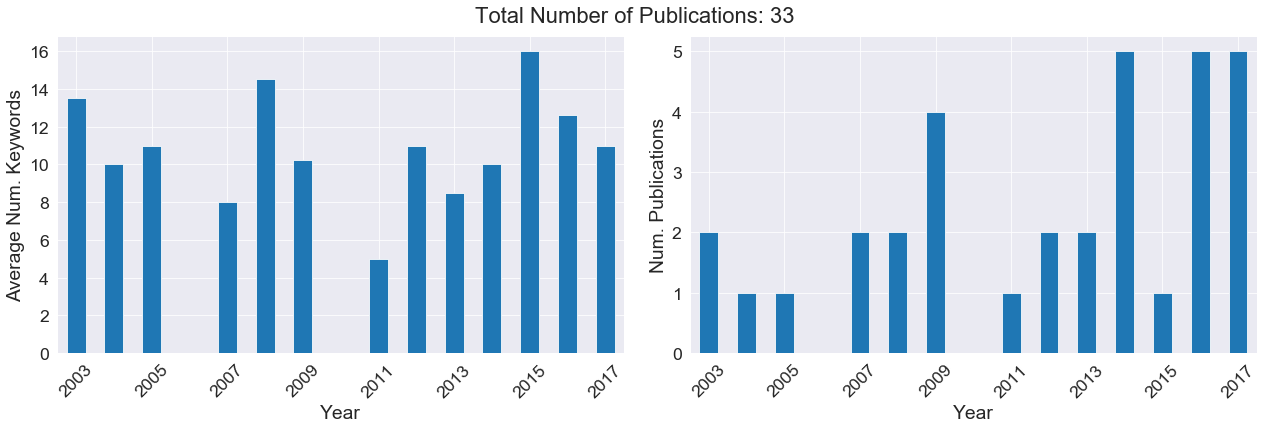

In [93]:
wos_plot.plot_kw_trend(all_model_analysis_software)

In [94]:
model_param_software = wosis.keyword_matches(model_param_rc, ['software', 'packages'], threshold=95.0)

In [122]:
all_model_param_software = model_param_software.combine_recs()
all_model_param_software_df = wosis.rc_to_df(all_model_param_software)
all_model_param_software_df.to_csv('all_model_param_software.csv', index=False)

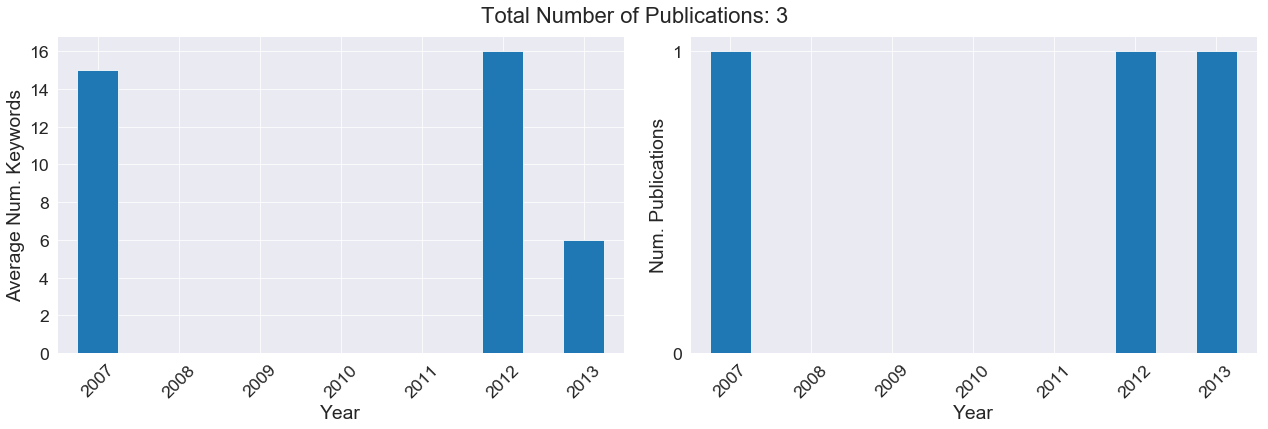

In [96]:
wos_plot.plot_kw_trend(all_model_param_software)

In [97]:
model_sens_software = wosis.keyword_matches(model_sens_rc, ['software', 'packages'], threshold=95.0)

In [123]:
all_model_sens_software = model_sens_software.combine_recs()
all_model_sens_software_df = wosis.rc_to_df(all_model_sens_software)
all_model_sens_software_df.to_csv('all_model_sens_software.csv', index=False)

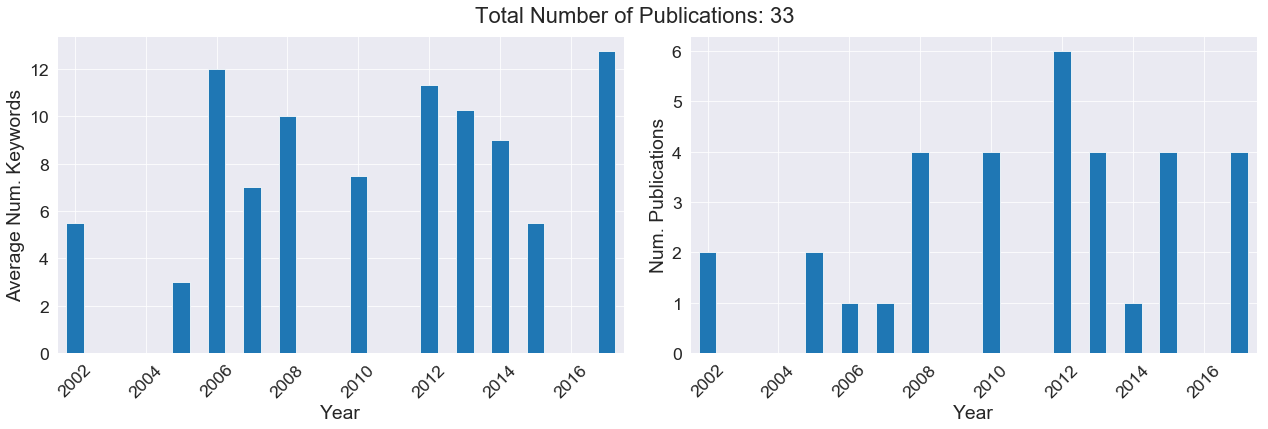

In [99]:
wos_plot.plot_kw_trend(all_model_sens_software)

<hr>
Frameworks and guidelines

In [100]:
model_analysis_framework = wosis.keyword_matches(model_analysis_rc, ['framework', 'guideline', 'comparison', 'evalua', 'review', 'critici', 'overview', 'diagnostic'], threshold=95.0)

In [124]:
all_model_analysis_framework = model_analysis_framework.combine_recs()
all_model_analysis_framework_df = wosis.rc_to_df(all_model_analysis_framework)
all_model_analysis_framework_df.to_csv('all_model_analysis_framework.csv', index=False)

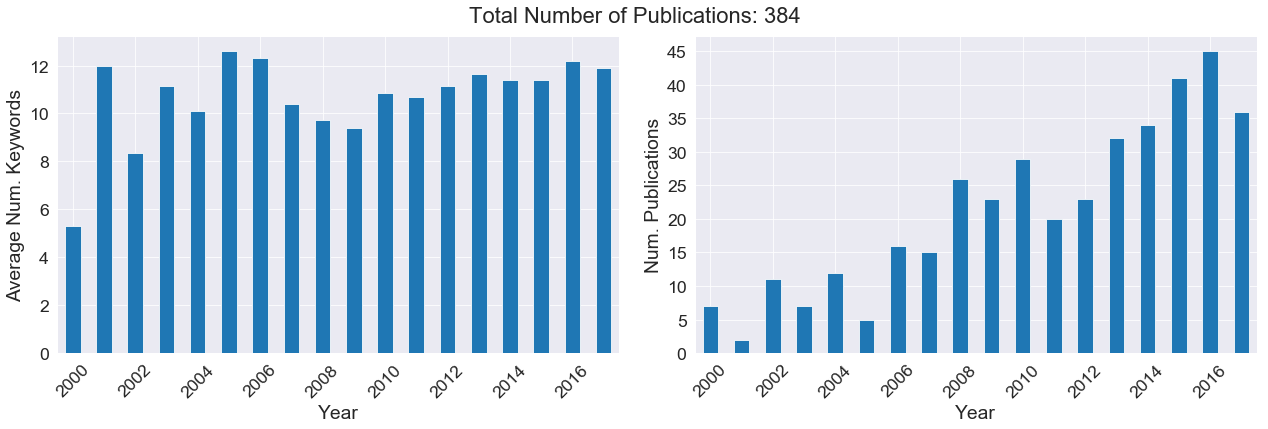

In [102]:
wos_plot.plot_kw_trend(all_model_analysis_framework)

In [103]:
model_param_framework = wosis.keyword_matches(model_param_rc, ['framework', 'guideline', 'comparison', 'evalua', 'review', 'critici', 'overview', 'diagnostic'], threshold=95.0)

In [125]:
all_model_param_framework = model_param_framework.combine_recs()
all_model_param_framework_df = wosis.rc_to_df(all_model_param_framework)
all_model_param_framework_df.to_csv('all_model_param_framework.csv', index=False)

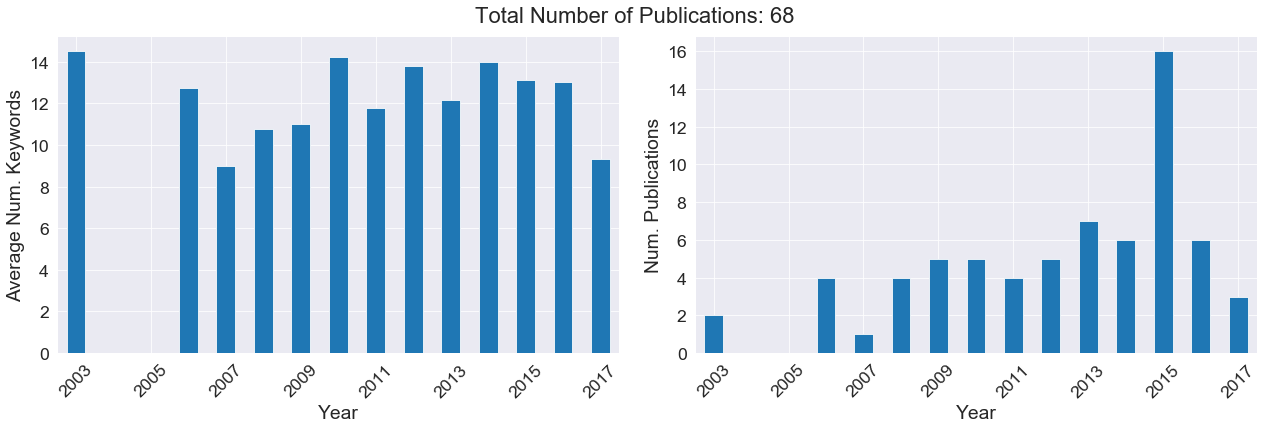

In [105]:
wos_plot.plot_kw_trend(all_model_param_framework)

In [106]:
model_sens_framework = wosis.keyword_matches(model_sens_rc, ['framework', 'guideline', 'comparison', 'evalua', 'review', 'critici', 'overview', 'diagnostic'], threshold=95.0)

In [126]:
all_model_sens_framework = model_sens_framework.combine_recs()
all_model_sens_framework_df = wosis.rc_to_df(all_model_sens_framework)
all_model_sens_framework_df.to_csv('all_model_sens_framework.csv', index=False)

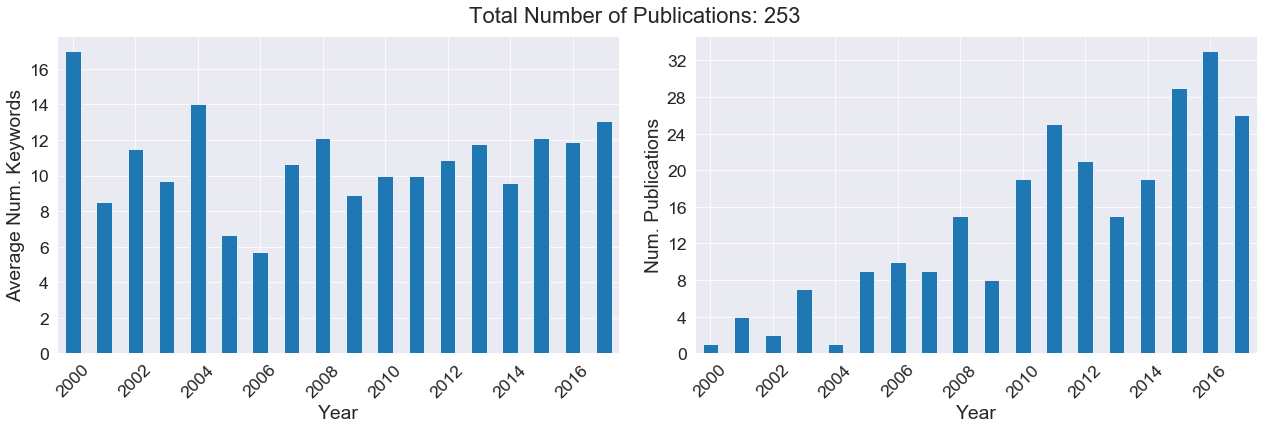

In [108]:
wos_plot.plot_kw_trend(all_model_sens_framework)

<hr>
Applications

In [109]:
model_analysis_app = wosis.keyword_matches(model_analysis_rc, ['appl', 'watershed', 'quantify', 'perform', 'calculate'], threshold=95.0)

In [127]:
all_model_analysis_app = model_analysis_app.combine_recs()
all_model_analysis_app_df = wosis.rc_to_df(all_model_analysis_app)
all_model_analysis_app_df.to_csv('all_model_analysis_app.csv', index=False)

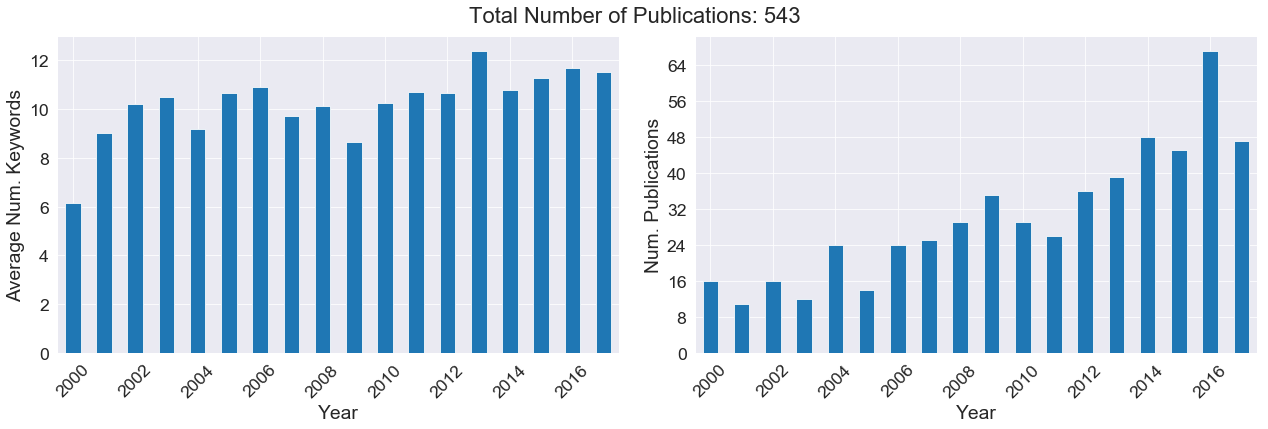

In [111]:
wos_plot.plot_kw_trend(all_model_analysis_app)

In [112]:
model_param_app = wosis.keyword_matches(model_param_rc, ['appl', 'watershed', 'quantify', 'perform', 'calculate'], threshold=95.0)

In [128]:
all_model_param_app = model_param_app.combine_recs()
all_model_param_app_df = wosis.rc_to_df(all_model_param_app)
all_model_param_app_df.to_csv('all_model_param_app.csv', index=False)

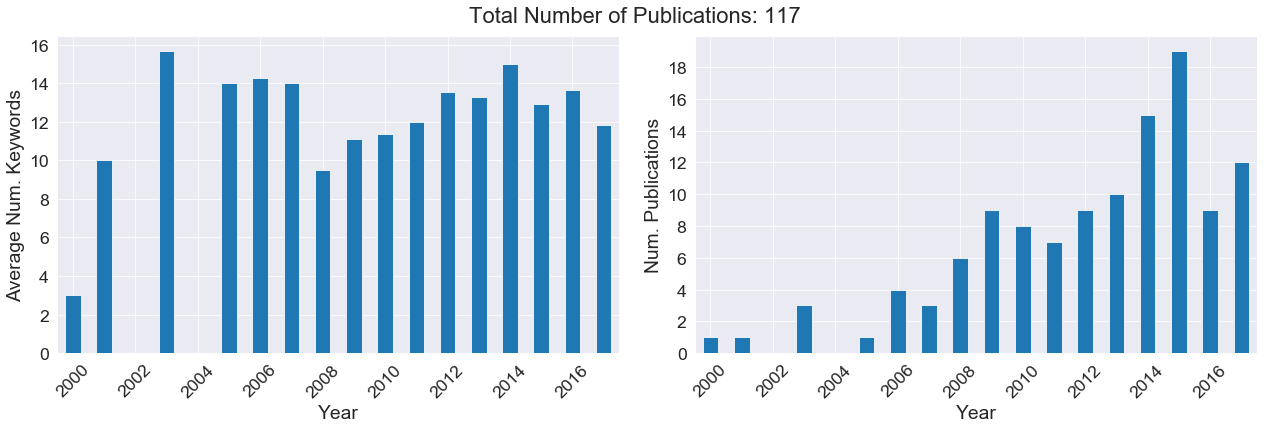

In [114]:
wos_plot.plot_kw_trend(all_model_param_app)

In [115]:
model_sens_app = wosis.keyword_matches(model_sens_rc, ['appl', 'watershed', 'quantify', 'perform', 'calculate'], threshold=95.0)

In [129]:
all_model_sens_app = model_sens_app.combine_recs()
all_model_sens_app_df = wosis.rc_to_df(all_model_sens_app)
all_model_sens_app_df.to_csv('all_model_sens_app.csv', index=False)

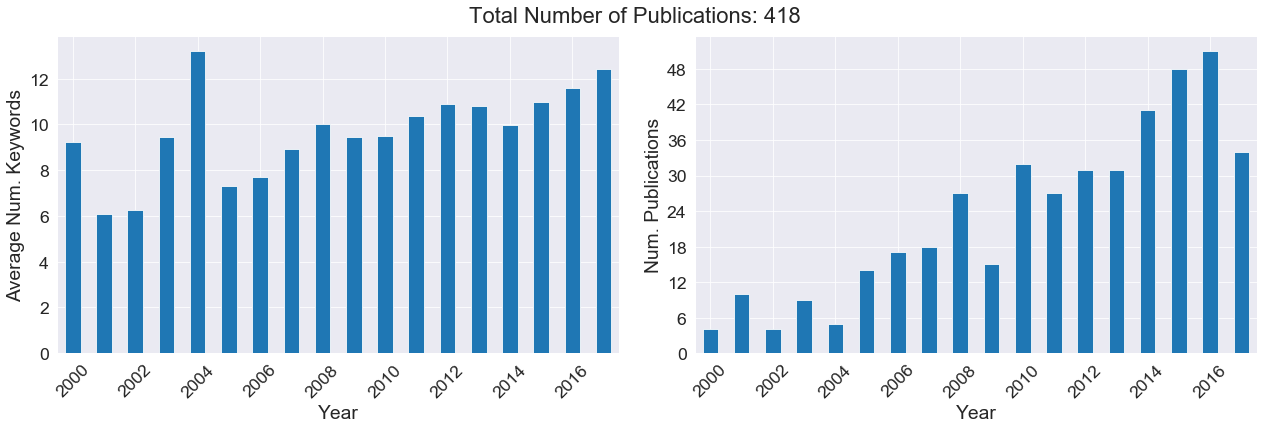

In [117]:
wos_plot.plot_kw_trend(all_model_sens_app)